In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [2]:
# -*- coding: utf-8 -*- 
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体
mpl.rcParams['axes.unicode_minus'] = False

In [30]:
path = r'C:\Users\judit\python\bank model\account_data.xlsx'
#path = r'D:\Uda\account_data.xlsx'
df = pd.read_excel(path, header=0)

df.drop(['证件号码','客户名称','单位名称','户籍所在地','原管户客户经理','现管户客户经理'],axis=1,inplace=True)

In [5]:
path1 = r'C:\Users\judit\Uda\account_data1.xlsx'
#path1 = r'D:\Uda\account_data1.xlsx'
df1 = pd.read_excel(path1, header=0)
df1.drop(['证件号码','客户名称','单位名称','户籍所在地','原管户客户经理','现管户客户经理'],axis=1,inplace=True)

### data cleaning

### Questions summary:
+ 过去24个月内逾期最长持续月份数(含贷款、贷记卡)	过去24个月内逾期最长持续月份数(含贷款、贷记卡).1 not the same, 20 records are different
+ '性别' replace '男 ' with '男'
+ '婚姻状况' merge '离异', '离婚' and ' 离婚 '
+ '学历' merge '大学本科' and '本科'
+ '五级分类' remove '\xa0' in '\xa0正常', '\xa0关注'
+ '个人主要税前年收入'contains both string and int, some records have YUAN, some have wan

### Q1 need explaination!!!

In [32]:
d0 = df[(df['过去24个月内逾期最长持续月份数(含贷款、贷记卡)']!=df['过去24个月内逾期最长持续月份数(含贷款、贷记卡).1'])]

import openpyxl

d0.to_excel(r'C:\Users\judit\Uda\unclear_data.xlsx')

sum(df['过去24个月内逾期最长持续月份数(含贷款、贷记卡)']==df['过去24个月内逾期最长持续月份数(含贷款、贷记卡).1'])

2848

In [34]:
d0.shape

(20, 45)

In [67]:
df['性别'] = df['性别'].str.replace('男 ','男')
df.replace({'婚姻状况':{' 离婚 ':'离异','离婚':'离异'},'学历':{'大学本科':'本科'}},inplace=True)
df['婚姻状况'].fillna('未知',inplace=True)
df.replace({'五级分类':{'\xa0正常':'正常','\xa0关注':'关注','\xa0次级':'次级'}},inplace=True)

In [6]:
df1['性别'] = df1['性别'].str.replace('男 ','男')
df1.replace({'婚姻状况':{' 离婚 ':'离异','离婚':'离异', ' 离异 ':'离异'},'学历':{'大学本科':'本科'}},inplace=True)
df1['婚姻状况'].fillna('未知',inplace=True)
df1.replace({'五级分类':{'\xa0正常':'正常','\xa0关注':'关注','\xa0次级':'次级'}},inplace=True)

In [22]:
def plot_bar(df,col):
    tem = df.groupby(col).size()
    print(tem)
    tem.sort_values().plot(kind='bar')
    plt.title('{}的数据分布图'.format(col))

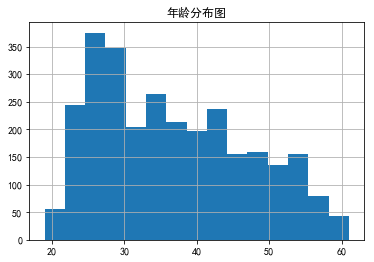

In [23]:
df1['年龄'].hist(bins=15)
plt.title('年龄分布图');

In [90]:
df1['婚姻状况'].unique()

array(['已婚', '未婚', '离异', '丧偶'], dtype=object)

婚姻状况
丧偶      25
已婚    2271
未婚     506
离异      66
dtype: int64


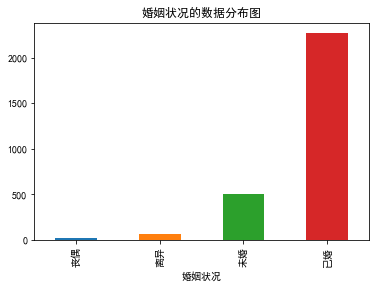

In [106]:
plot_bar(df1,'婚姻状况')

学历
中专/中等技校    238
初中         534
大学专科       421
小学          38
技术学校        28
文盲或半文盲       1
未知         854
本科         183
研究生         12
高中         559
dtype: int64


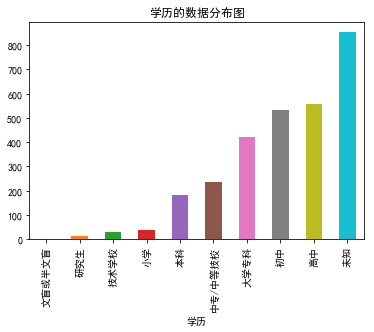

In [107]:
plot_bar(df1,'学历')

五级分类
关注      51
次级      30
正常    2787
dtype: int64


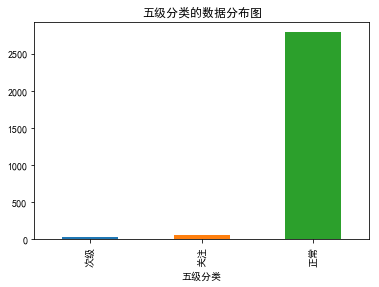

In [115]:
plot_bar(df1,'五级分类')

In [8]:
idx = df1[df1['个人主要税前年收入'].str.contains('元|万',na=False)].index

#收入格式正确的
correct = df1.drop(idx,axis=0)
err1 = df1.iloc[idx,:]

s1 = err1['个人主要税前年收入']
s2 = err1.replace({'个人主要税前年收入':{'元':'','万元':'0000','万':'0000'}},regex=True)['个人主要税前年收入']

comp = DataFrame({'oringinal':s1,'modified':s2})
comp.loc[191,'modified'] = 84000
comp.loc[194,'modified'] = 96000
comp.loc[195,'modified'] = 82800
comp.loc[198,'modified'] = 36000
comp.loc[200,'modified'] = 66000

err1['个人主要税前年收入'] = comp.iloc[:,0].astype(int)

df2 = correct.append(err1,ignore_index=False).reset_index(drop=True)

df2['个人主要税前年收入'] = pd.to_numeric(df2['个人主要税前年收入'])

C:\Users\judit\Anaconda3\envs\ex1\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
df2.head()

,性别,年龄,婚姻状况,学历,所属行业,产品标识,五级分类,个人主要税前年收入,是否有未结清的保证人代偿贷款,最近1个月内的查询次数（贷款）,...,过去24个月内贷记卡逾期最长持续月份数,最近一次贷记卡逾期距今月份数,过去12个月内逾期月份数(含贷款、贷记卡),过去24个月内逾期月份数(含贷款、贷记卡),过去24个月内逾期最长持续月份数(含贷款、贷记卡),最近一次逾期距今月份数(含贷款、贷记卡),未结清贷款余额,已使用贷记卡额度,已使用准贷记卡透支余额,当前负债汇总(含贷款、贷记卡、准贷记卡)
0,女,34,已婚,初中,个人贷款,个人一手车贷款,正常,100000.0,否,1,...,0,0,0,0,0,0,0,0,0,0
1,男,29,已婚,大学专科,信息传输、软件和信息技术服务业,个人一手车贷款,正常,45600.0,否,0,...,0,0,0,0,0,0,0,15008,0,15008
2,男,28,已婚,未知,住宿和餐饮业,个人一手车贷款,正常,48000.0,否,1,...,0,0,0,0,0,0,0,0,0,0
3,男,27,已婚,未知,建筑业,个人一手车贷款,正常,60000.0,否,0,...,0,0,0,0,0,0,0,0,0,0
4,男,28,已婚,未知,信息传输、软件和信息技术服务业,个人一手车贷款,正常,72000.0,否,0,...,0,0,0,0,0,0,0,700,0,700


In [10]:
df2['是否有未结清的保证人代偿贷款'].unique()

array(['否', '无', '是 ', '是', 0, '有', '无 ', 13654, 1], dtype=object)

In [11]:
df2.replace({'是否有未结清的保证人代偿贷款':{'是':1,'是 ':1,'有':1,13654:1,'否':0,'无':0,'无 ':0}},inplace=True)

是否有未结清的保证人代偿贷款
0    2849
1      19
dtype: int64


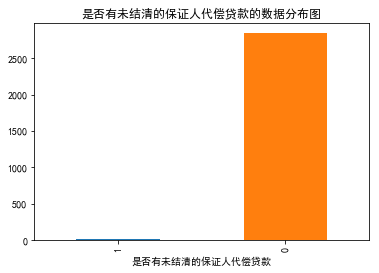

In [12]:
plot_bar(df2,'是否有未结清的保证人代偿贷款')

In [13]:
df2.replace({'所属行业':{'信息传输、软件和信息技术服务':'信息传输、软件和信息技术服务业',\
                    '公共管理、社会保障和社会保障':'公共管理、社会保障和社会组织',\
                    '农、林、牧、渔业':'农林牧渔业','养殖':'农林牧渔业',\
                     '服务业':'居民服务、修理和其他服务业',\
                    '居民服务、修路和其他服务':'居民服务、修理和其他服务业',\
                    '批发业':'批发和零售业','批发和零售业务':'批发和零售业',\
                    '水利、环保、公共设施管理':'水利、环境和公共设施管理业',\
                    '电力、热力、燃气及水生产和供应业':'电力、热力、燃气及水生产和供应',\
                    '电力、热力、燃烧及水生产和供应业':'电力、热力、燃气及水生产和供应',\
                    '租赁和商业服务业':'租赁和商务服务业'}},inplace=True)

所属行业
0                    1
个人贷款               789
交通运输、仓储和邮政业         27
住宿和餐饮业             218
信息传输、软件和信息技术服务业     60
公共管理、社会保障和社会组织      49
农林牧渔业              105
制造业                169
卫生和社会工作             23
居民服务、修理和其他服务业      211
建筑业                 67
房地产业                12
批发和零售业             127
教育                  48
文化、体育和娱乐业           19
无                  572
水利、环境和公共设施管理业       10
电力、热力、燃气及水生产和供应     43
科学研究和技术服务业          12
租赁和商务服务业            38
采矿业                217
金融业                 35
dtype: int64


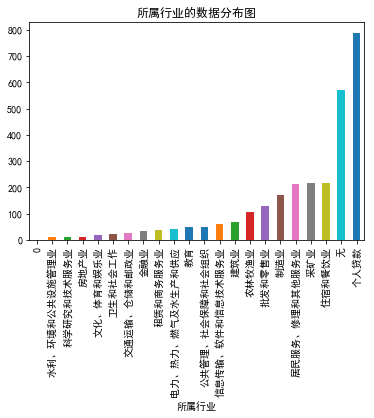

In [14]:
plot_bar(df2,'所属行业')

In [15]:
df2['产品标识'].unique()

array(['\xa0个人一手车贷款', '\xa0个人住房按揭贷款', '\xa0薪车贷（A）', '\xa0个人商业用房按揭贷款',
       '\xa0个人公寓按揭贷款', '光伏贷', '\xa0光伏贷', '房抵贷C', '个人商业用房按揭贷款', '其他',
       '个人住房按揭贷款', '个人综合消费贷款', '房抵贷', '\xa0个人综合消费贷款'], dtype=object)

In [16]:
df2.replace({'产品标识':{'\xa0个人一手车贷款':'个人一手车贷款',\
                    '\xa0个人住房按揭贷款':'个人住房按揭贷款',\
                    '\xa0薪车贷（A）':'薪车贷A',\
                    '\xa0个人商业用房按揭贷款':'个人商业用房按揭贷款',\
                    '\xa0个人公寓按揭贷款':'个人公寓按揭贷款',\
                    '\xa0光伏贷':'光伏贷','\xa0个人综合消费贷款':'个人综合消费贷款',
                    }},inplace=True)

产品标识
个人一手车贷款       1550
个人住房按揭贷款       303
个人公寓按揭贷款        22
个人商业用房按揭贷款      10
个人综合消费贷款        10
光伏贷            594
其他               8
房抵贷              8
房抵贷C            25
薪车贷A           338
dtype: int64


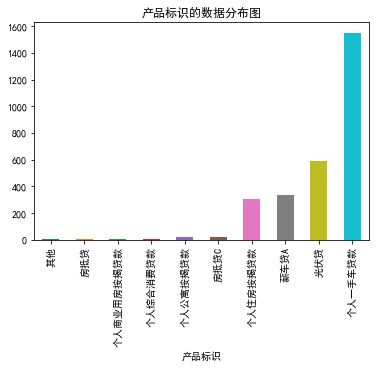

In [17]:
plot_bar(df2,'产品标识')

最近1个月内的查询次数（贷款）
0    2228
1     515
2      91
3      22
4       5
5       7
dtype: int64


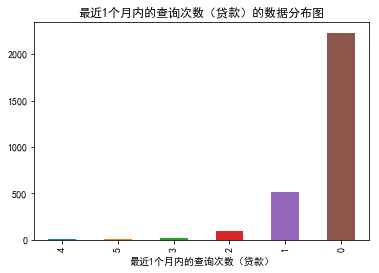

In [24]:
plot_bar(df2,'最近1个月内的查询次数（贷款）')

In [25]:
df2['最近1个月内的查询次数（信用卡）']=df2['最近1个月内的查询次数（信用卡）'].fillna(0).astype(int)

最近1个月内的查询次数（信用卡）
0    2459
1     301
2      60
3      35
4       4
5       5
7       1
8       3
dtype: int64


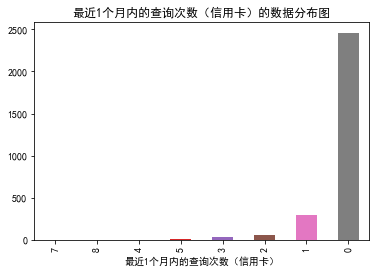

In [26]:
plot_bar(df2,'最近1个月内的查询次数（信用卡）')

In [27]:
df2['最近1个月内的查询次数（贷款+信用卡）']=df2['最近1个月内的查询次数（贷款+信用卡）'].fillna(0).astype(int)

最近1个月内的查询次数（贷款+信用卡）
0     1985
1      609
2      164
3       61
4       22
5       12
6        4
7        7
9        1
13       3
dtype: int64


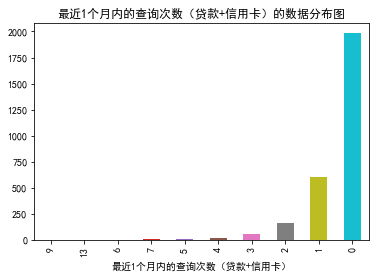

In [28]:
plot_bar(df2,'最近1个月内的查询次数（贷款+信用卡）')

In [29]:
bo= df2['最近1个月内的查询次数（贷款）']+df2['最近1个月内的查询次数（信用卡）']==df2['最近1个月内的查询次数（贷款+信用卡）']

In [231]:
df2[~bo].to_excel(r'D:\Uda\not_equal.xlsx')

In [46]:
df2['最近6个月内的查询次数（贷款）']=df2['最近6个月内的查询次数（贷款）'].fillna(0).astype(int)

最近6个月内的查询次数（贷款）
0     2042
1      556
2      145
3       53
4       29
5       21
6        6
7        5
8        2
9        4
10       1
11       2
13       1
19       1
dtype: int64


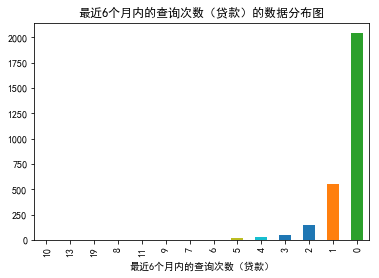

In [47]:
plot_bar(df2,'最近6个月内的查询次数（贷款）')

最近6个月内的查询次数（信用卡）
0     2153
1      318
2      192
3       86
4       37
5       26
6       18
7       17
8        9
9        5
10       2
11       2
13       1
15       2
dtype: int64


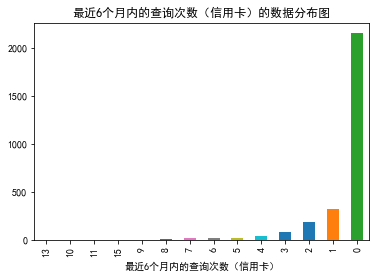

In [36]:
plot_bar(df2,'最近6个月内的查询次数（信用卡）')

最近6个月内的查询次数（贷款+信用卡）
0     1675
1      575
2      261
3      121
4       74
5       55
6       17
7       21
8       10
9       15
10      12
11      11
12       8
13       4
15       1
16       2
17       2
18       1
19       1
22       1
26       1
dtype: int64


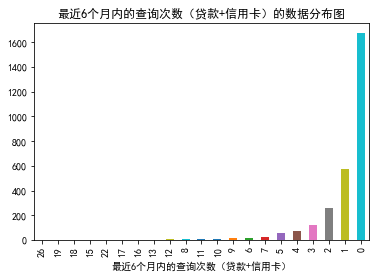

In [37]:
plot_bar(df2,'最近6个月内的查询次数（贷款+信用卡）')

In [48]:
bo1 = df2['最近6个月内的查询次数（贷款）']+df2['最近6个月内的查询次数（信用卡）']==df2['最近6个月内的查询次数（贷款+信用卡）']

In [53]:
df2[~bo1].to_excel(r'C:\Users\judit\Uda\not_equal2.xlsx')

未结清贷款笔数
0     2422
1      311
2       62
3       33
4       15
5        6
7        2
8        4
9        6
10       1
11       1
13       1
19       1
20       2
54       1
dtype: int64


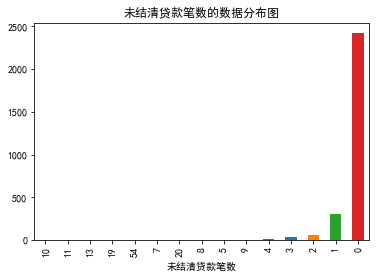

In [56]:
plot_bar(df2,'未结清贷款笔数')#df2['未结清贷款笔数'].unique()

In [8]:
df.columns

Index(['性别', '年龄', '婚姻状况', '学历', '所属行业', '产品标识', '五级分类', '个人主要税前年收入',
       '是否有未结清的保证人代偿贷款', '最近1个月内的查询次数（贷款）', '最近1个月内的查询次数（信用卡）',
       '最近1个月内的查询次数（贷款+信用卡）', '最近6个月内的查询次数（贷款）', '最近6个月内的查询次数（信用卡）',
       '最近6个月内的查询次数（贷款+信用卡）', '未结清贷款笔数', '未结清贷款机构数', '未销户的贷记卡发卡机构数',
       '未结清贷款涉及到非银行类金融机构的机构数', '未结清的个人消费或其他贷款涉及到金融机构的机构数', '当前逾期期数最大值(贷款)',
       '当前逾期期数最大值(贷记卡)', '当前逾期期数最大值(含贷款、贷记卡)', '当前逾期的贷款账户数', '当前逾期的贷记卡账户数',
       '当前逾期的贷款、贷记卡账户数总和', '过去12个月内贷款逾期月份数', '过去24个月内贷款逾期月份数',
       '过去12个月内贷款逾期最长持续月份数', '过去24个月内贷款逾期最长持续月份数', '最近一次贷款逾期距今月份数',
       '过去12个月内贷记卡逾期月份数', '过去24个月内贷记卡逾期月份数', '过去12个月内货记卡逾期最长持续月份数',
       '过去24个月内贷记卡逾期最长持续月份数', '最近一次贷记卡逾期距今月份数', '过去12个月内逾期月份数(含贷款、贷记卡)',
       '过去24个月内逾期月份数(含贷款、贷记卡)', '过去24个月内逾期最长持续月份数(含贷款、贷记卡)',
       '过去24个月内逾期最长持续月份数(含贷款、贷记卡).1', '最近一次逾期距今月份数(含贷款、贷记卡)', '未结清贷款余额',
       '已使用贷记卡额度', '已使用准贷记卡透支余额', '当前负债汇总(含贷款、贷记卡、准贷记卡)'],
      dtype='object')

In [6]:
dict= {'性别':'sex', '年龄':'age', '婚姻状况':'marriage_state', '学历':'education', '所属行业':'professional_field', \
       '产品标识':'applied_product', '五级分类':'classes_5', '个人主要税前年收入':'annual_income',
       '是否有未结清的保证人代偿贷款':'unpaied_loan_guarantor', '最近1个月内的查询次数（贷款）':'query_loan_1m', \
       '最近1个月内的查询次数（信用卡）':'query_credict_1m',
       '最近1个月内的查询次数（贷款+信用卡）':'query_locre_1m', '最近6个月内的查询次数（贷款）':'query_loan_6m', \
       '最近6个月内的查询次数（信用卡）':'query_credict_6m',
       '最近6个月内的查询次数（贷款+信用卡）':'query_locre_6m', '未结清贷款笔数':'num_unpaid_loans', '未结清贷款机构数':'num_unpaid_organizations',\
       '未销户的贷记卡发卡机构数':'undelete_credict_organizations_num','未结清贷款涉及到非银行类金融机构的机构数':'unpaid_loan_unbank_org_num',\
       '未结清的个人消费或其他贷款涉及到金融机构的机构数':'unpaid_other_fina_org_num',\
       '当前逾期期数最大值(贷款)':'maximum_excess_loan','当前逾期期数最大值(贷记卡)':'maximum_excess_credit',\
       '当前逾期期数最大值(含贷款、贷记卡)':'maximum_excess_loan_credit',\
       '当前逾期的贷款账户数':'maximum_excess_loan_accounts','当前逾期的贷记卡账户数':'maximum_excess_credit_accounts',\
       '当前逾期的贷款、贷记卡账户数总和':'maximum_excess_loan_credit_accounts',\
       '过去12个月内贷款逾期月份数':'num_excess_month_loan12','过去24个月内贷款逾期月份数':'num_excess_month_loan24',\
       '过去12个月内贷款逾期最长持续月份数':'lasting_month_loan12','过去24个月内贷记卡逾期最长持续月份数':'lasting_month_loan24',\
       '最近一次贷款逾期距今月份数':'duration_last_unpaid_loan','过去12个月内贷记卡逾期月份数':'num_excess_month_credit12',\
       '过去24个月内贷记卡逾期月份数':'num_excess_month_credit24',\
       '过去12个月内货记卡逾期最长持续月份数':'lasting_month_credit12','最近一次贷记卡逾期距今月份数':'duration_last_unpaid_credit',\
       '过去12个月内逾期月份数(含贷款、贷记卡)':'num_excess_month_locre12','过去24个月内逾期月份数(含贷款、贷记卡)':'num_excess_month_locre24',\
       '过去24个月内逾期最长持续月份数(含贷款、贷记卡)':'lasting_month_lacre24',\
       '过去24个月内逾期最长持续月份数(含贷款、贷记卡).1':'lasting_month_lacre24a',\
       '最近一次逾期距今月份数(含贷款、贷记卡)':'duration_last_unpaid_locred','未结清贷款余额':'unpaid_loan_amount',\
       '已使用贷记卡额度':'used_credit','已使用准贷记卡透支余额':'used_quasi_credit',\
       '当前负债汇总(含贷款、贷记卡、准贷记卡)':'total_debts'}

In [9]:
#df.columns
col = ['sex','age','marriage_state','education','professional_field',\
       'applied_product','classes_5', 'annual_income',\
       'unpaied_loan_guarantor','query_loan_1m','query_credict_1m','query_locre_1m',
      'query_loan_6m','query_credict_6m','query_locre_6m','num_unpaid_loans',\
      'num_unpaid_organizations','undelete_credict_organizations',\
      'unpaid_loan_unbank_org','unpaid_other_fina_org','']

,性别,年龄,婚姻状况,学历,所属行业,产品标识,五级分类,个人主要税前年收入,是否有未结清的保证人代偿贷款,最近1个月内的查询次数（贷款）,...,最近一次贷记卡逾期距今月份数,过去12个月内逾期月份数(含贷款、贷记卡),过去24个月内逾期月份数(含贷款、贷记卡),过去24个月内逾期最长持续月份数(含贷款、贷记卡),过去24个月内逾期最长持续月份数(含贷款、贷记卡).1,最近一次逾期距今月份数(含贷款、贷记卡),未结清贷款余额,已使用贷记卡额度,已使用准贷记卡透支余额,当前负债汇总(含贷款、贷记卡、准贷记卡)
0,男,25,已婚,大学专科,住宿和餐饮业,个人一手车贷款,正常,100000元,否,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
1,男,30,未婚,高中,住宿和餐饮业,薪车贷（A）,正常,40000元,否,2,...,14,0.0,1.0,1.0,1.0,14,156958,10559,0.0,167517
2,男,49,已婚,初中,住宿和餐饮业,薪车贷（A）,正常,200000元,否,0,...,0,0.0,0.0,0.0,0.0,0,0,810,0.0,810
3,男,28,已婚,中专/中等技校,采矿业,薪车贷（A）,正常,70000元,否,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
4,女,34,已婚,初中,个人贷款,个人一手车贷款,正常,100000,否,1,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0


In [13]:
df['学历'].unique()

array(['大学专科', '高中', '初中', '中专/中等技校', '未知', '本科', '小学', '技术学校', '研究生',
       '文盲或半文盲'], dtype=object)

In [19]:
df['当前逾期期数最大值(贷款)'].unique()

array([0.000e+00, 1.000e+00,       nan, 1.998e+04, 1.500e+02, 1.390e+02,
       7.000e+00, 2.289e+03, 1.000e+03])

In [22]:
df['五级分类'].unique()

array(['\xa0正常', '\xa0关注', '\xa0次级', '正常'], dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2868 entries, 0 to 2867
Data columns (total 46 columns):
性别                             2868 non-null object
年龄                             2868 non-null int64
婚姻状况                           1578 non-null object
学历                             2868 non-null object
单位名称                           2852 non-null object
所属行业                           2852 non-null object
产品标识                           2868 non-null object
五级分类                           2868 non-null object
个人主要税前年收入                      2867 non-null object
是否有未结清的保证人代偿贷款                 2868 non-null object
最近1个月内的查询次数（贷款）                2868 non-null int64
最近1个月内的查询次数（信用卡）               2867 non-null float64
最近1个月内的查询次数（贷款+信用卡）            2867 non-null float64
最近6个月内的查询次数（贷款）                2866 non-null float64
最近6个月内的查询次数（信用卡）               2868 non-null int64
最近6个月内的查询次数（贷款+信用卡）            2868 non-null int64
未结清贷款笔数                        2868 non-null int64
未结清贷款机构数   

In [28]:
df[df['婚姻状况'].isnull()]

,性别,年龄,婚姻状况,学历,单位名称,所属行业,产品标识,五级分类,个人主要税前年收入,是否有未结清的保证人代偿贷款,...,最近一次贷记卡逾期距今月份数,过去12个月内逾期月份数(含贷款、贷记卡),过去24个月内逾期月份数(含贷款、贷记卡),过去24个月内逾期最长持续月份数(含贷款、贷记卡),过去24个月内逾期最长持续月份数(含贷款、贷记卡).1,最近一次逾期距今月份数(含贷款、贷记卡),未结清贷款余额,已使用贷记卡额度,已使用准贷记卡透支余额,当前负债汇总(含贷款、贷记卡、准贷记卡)
15,女,44,NaN,初中,朔州市朔城区焦三女食品店,居民服务、修理和其他服务业,个人一手车贷款,正常,24万元,无,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
16,男,35,NaN,大学专科,嘉合伟业房地产经纪公司,房地产业,个人一手车贷款,正常,60000,无,...,0,0.0,0.0,0.0,0.0,0,0,6974,0.0,6974
201,女,50,NaN,未知,汇富贵休闲服装店,住宿和餐饮业,个人一手车贷款,正常,100000,无,...,27个月,0.0,0.0,0.0,0.0,0,285167,NaN,51562.0,336729
202,女,34,NaN,高中,光丽达广告传媒有限公司,住宿和餐饮业,个人一手车贷款,关注,50000,无,...,0,0.0,0.0,0.0,0.0,0,0,10000,0.0,1353
203,男,22,NaN,未知,富士康,住宿和餐饮业,个人一手车贷款,正常,50000,无,...,0,0.0,0.0,0.0,0.0,0,0,16000,0.0,10761
204,男,24,NaN,初中,山西金生机械工程有限公司,住宿和餐饮业,个人一手车贷款,次级,200000,无,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
205,男,22,NaN,技术学校,太原市金水水果经销部,住宿和餐饮业,个人一手车贷款,正常,200000,无,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
206,男,40,NaN,未知,东辰祥瑞项目,信息传输、软件和信息技术服务业,个人一手车贷款,正常,100000,无,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
207,男,26,NaN,未知,山西新天誉科技有限公司,住宿和餐饮业,个人一手车贷款,关注,100000,无,...,48个月,0.0,0.0,0.0,0.0,0,0,17000,0.0,16702
208,男,25,NaN,中专/中等技校,山西奥凯建筑有限公司,建筑业,个人一手车贷款,正常,50000,无,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
